# Binary classification with Keras neural network

This notebook can be used if you want to train the model yourself!

Original notebook: https://www.kaggle.com/kosovanolexandr/keras-nn-x-ray-predict-pneumonia-86-54

Dataset: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Imports

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

### Verify our directories structure

In [3]:
print(os.listdir("./"))

print(os.listdir("./data/chest_xray"))

print(os.listdir("./data/chest_xray/test"))

print(os.listdir("./data/chest_xray/train/"))

print(os.listdir("./data/chest_xray/val/"))

['georgia-history.csv', 'data', 'pneumonia_model.h5', 'x-ray-predict-pneumonia-keras-training.ipynb', 'first_try.h5', 'georgia-covidtracking.ipynb', 'georgia-history (1).csv', 'create_notifications.ipynb', '.ipynb_checkpoints', '.git', '.log', 'LICENSE']
['train', '.DS_Store', 'val', 'test']
['.DS_Store', 'NORMAL', 'PNEUMONIA']
['.DS_Store', 'NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


### Check an image in the "NORMAL" training set

NORMAL


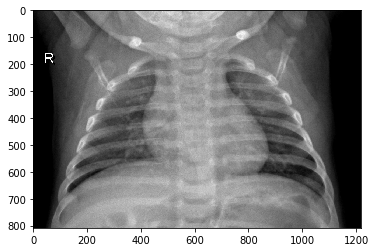

In [4]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('./data/chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

### Check an image in the PNEUMONIA training set

In [5]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img('./data/chest_xray/train/PNEUMONIA/' + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/chest_xray/train/PNEUMONIA/person63_bacteria_306.jpeg'

### Initialize variables

In [6]:
# dimensions of our images.
img_width, img_height = 150, 150

In [7]:
train_data_dir = './data/chest_xray/train'
validation_data_dir = './data/chest_xray/val'
test_data_dir = './data/chest_xray/test'

nb_train_samples = 512
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [8]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Create Sequential model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

### Check information about the model

In [10]:
model.layers

In [11]:
model.input

<tf.Tensor 'conv2d_input:0' shape=(None, 150, 150, 3) dtype=float32>

In [12]:
model.output

<tf.Tensor 'activation_4/Sigmoid:0' shape=(None, 1) dtype=float32>

### Compile the model

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Upload images from the different sets

In [49]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [50]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [51]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 830 images belonging to 2 classes.


In [52]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [53]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


### Fit the model

In [54]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
32/32 [==============================] - 35s 1s/step - loss: 0.4727 - accuracy: 0.8700 - val_loss: 3.4868 - val_accuracy: 0.2500
Epoch 2/20
32/32 [==============================] - 34s 1s/step - loss: 0.4021 - accuracy: 0.8833 - val_loss: 1.2089 - val_accuracy: 0.4375
Epoch 3/20
32/32 [==============================] - 34s 1s/step - loss: 0.3221 - accuracy: 0.8967 - val_loss: 1.3694 - val_accuracy: 0.4375
Epoch 4/20
32/32 [==============================] - 34s 1s/step - loss: 0.2635 - accuracy: 0.8913 - val_loss: 1.1995 - val_accuracy: 0.2500
Epoch 5/20
32/32 [==============================] - 34s 1s/step - loss: 0.2582 - accuracy: 0.8969 - val_loss: 1.5439 - val_accuracy: 0.3750
Epoch 6/20
32/32 [==============================] - 34s 1s/step - loss: 0.2584 - accuracy: 0.8814 - val_loss: 1.6217 - val_accuracy: 0.3750
Epoch 7/20
32/32 [==============================] - 34s 1s/step - loss: 0.2405 - accuracy: 0.8851 - val_loss: 1.4600 - val_accuracy: 0.4375
Epoch 8/20
32/32 [==

### Save the model (weights + complete model)

In [55]:
model.save_weights('first_try.h5')

In [56]:
model.save('pneumonia_model.h5')

### Evaluate the model

In [57]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2021-04-27 15:24:16,374 [225] WARNING  py.warnings:99: [JupyterRequire] /opt/app-root/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '




accuracy: 60.58%
